# Laminar herschel-Bulkley Similarity

As usual, we will begin by importing the necessary python packages

In [1]:
from barennet import SimilarityModel
import tensorflow as tf
import numpy as np

# Uncomment the line below if if you have tensorflow issues regarding your GPU:

tf.config.set_visible_devices([], 'GPU')

2024-07-08 14:11:00.753175: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-08 14:11:00.940611: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 14:11:00.940677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 14:11:00.966264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 14:11:01.024654: I tensorflow/core/platform/cpu_feature_guar

We will find the incomplete similarity exponents for the laminar newtonian 
mean velocity profile in wall coordinates. We know that the dimensionless quantities
involved are $(u^+, \hat{r}, He, Re_\tau)$. They are related through the following equation
where $\phi = He/Re_\tau^2$:

$$ u^+ = \frac{Re_\tau}{4} \left[ \left( 1 - \phi \right)^{\frac{n+1}{n}} - \left( \hat{r} - \phi \right)^{\frac{n+1}{n}} \right].$$

We provide a data file generated for $n= 0.3, 0.5$ and $1.0$, following the equation
above with $10 < Re_\tau < 100$, $10 < He < 100$ and $He / Re_\tau^2 < \hat{r} < 1$
(which is exactly the region outside of the plug). The MDDP construction of the 
four dimensionless quantities is also provided in the code cell below.

In [2]:
data_path = "../Data/HB_mvp_data_n_0.3.xlsx"
dimensionally_independent_parameters = ["mu", "rho", "D"]
dimensionally_dependent_parameters = ["r", "tau_y", "- dp/dz"]
dimensional_qoi = "u"
non_dimensional_parameters = ["r^", "He", "Re_tau"]
non_dimensional_qoi = "u+"
non_dimensional_params_construction = {
    "r^": {"r": 1.0, "tau_y": 0, "- dp/dz": 0, "mu": 0, "rho": 0, "D": -1}, 
    "Re_tau": {"r": 0, "- dp/dz": 1/2, "tau_y": 0, "mu": -1, "rho": 0.5, "D": 3/2}, 
    "He": {"r": 0, "tau_y": 1, "- dp/dz": 0, "mu": -2, "rho": 1, "D": 2}
}
non_dimensional_qoi_construction = {
    "u+": {"u": 1, "r": 0, "tau_y": 0, "- dp/dz": -0.5, "mu": 0, "rho": 0.5, "D": -0.5}
}
non_similar_params = ["r^", "He"]
similar_params = ["Re_tau"]

In [3]:
similarity_model = SimilarityModel(
    data_path=data_path,
    dimensionally_independent_params=dimensionally_independent_parameters,
    dimensionally_dependent_params=dimensionally_dependent_parameters,
    dimensional_qoi=dimensional_qoi,
    non_dimensional_params=non_dimensional_parameters,
    non_dimensional_qoi=non_dimensional_qoi,
    non_dimensional_params_construction=non_dimensional_params_construction,
    non_dimesional_qoi_construction=non_dimensional_qoi_construction,
    non_similar_params=non_similar_params,
    similar_params=similar_params)

### Buckingham's Similarity Group

As soon as the dimensionless construction is provided and we create an instance 
of the SimilarityModel class, the Buckingham's similarity group can be calculated
by solving a linear system (chapter 5 of the thesis).
It shoud read:
\begin{align*}
    &\mu^* = A_1 \mu, \ \ \ \rho^* = A_2 \rho, \ \ \ D^* = A_3 D \\ & \\
    & r^* = A_3 r, \ \ \ \tau_y^* = \frac{A_1^2}{A_2 A_3^2} \tau_y \\ & \\
    & \left( \frac{dp}{dz} \right)^* = \frac{A_1^2}{A_2 A_3^3} \left( \frac{dp}{dz} \right) \\ & \\
    &U^* = \frac{A_1}{A_2 A_3} U
\end{align*}

And, as you can see, this is exactly the output of the cell below.

In [4]:
similarity_model.print_buckingham_similarity_group()

mu* = A_1^1.0 A_2^0.0 A_3^0.0 mu
rho* = A_1^0.0 A_2^1.0 A_3^0.0 rho
D* = A_1^0.0 A_2^0.0 A_3^1.0 D
r* = A_1^0.0 A_2^0.0 A_3^1.0 r
tau_y* = A_1^2.0 A_2^-1.0 A_3^-2.0 tau_y
- dp/dz* = A_1^2.0 A_2^-1.0 A_3^-3.0 - dp/dz
u* = A_1^1.0 A_2^-1.0 A_3^-1.0 u


Write here what the barennet should find.

In [5]:
similarity_model.find_incomplete_similarity(n_tries=5, n_epochs=10, tol=5e-3)

Epoch 1/10


2024-07-08 14:12:14.598226: I external/local_xla/xla/service/service.cc:168] XLA service 0x7a44cc0ca670 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-07-08 14:12:14.598262: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-07-08 14:12:14.622820: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1720458734.719231    5603 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-07-08 14:12:14.720629: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-07-08 14:12:14.728053: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-07-08 14:12:14.738004: E external/local_xla/xl

30935/30935 - 35s - loss: 0.0467 - 35s/epoch - 1ms/step
Epoch 2/10
30935/30935 - 35s - loss: 0.0187 - 35s/epoch - 1ms/step
Epoch 3/10
30935/30935 - 37s - loss: 0.0129 - 37s/epoch - 1ms/step
Epoch 4/10
30935/30935 - 35s - loss: 0.0119 - 35s/epoch - 1ms/step
Epoch 5/10
30935/30935 - 32s - loss: 0.0112 - 32s/epoch - 1ms/step
Epoch 6/10
30935/30935 - 33s - loss: 0.0101 - 33s/epoch - 1ms/step
Epoch 7/10
30935/30935 - 34s - loss: 0.0091 - 34s/epoch - 1ms/step
Epoch 8/10
30935/30935 - 33s - loss: 0.0095 - 33s/epoch - 1ms/step
Epoch 9/10
30935/30935 - 34s - loss: 0.0087 - 34s/epoch - 1ms/step
Epoch 10/10
30935/30935 - 32s - loss: 0.0085 - 32s/epoch - 1ms/step
Incomplete Similarity Found!
Error = 0.0033616703003644943


After training has been performed, we can check the exponents found by the BarenNet by printing the dictionary used to store them in our class. 

$\cdot$ The entry dict["r^"]["Re_tau"] refers to the exponent of $Re_\tau$ when it is multiplied by $\hat{r}$ i.e. $\xi_3^{(1)}$;

$\cdot$ The entry dict["He"]["Re_tau"] refers to the exponent of $Re_\tau$ when it is multiplied by $He$ i.e. $\xi_3^{(2)}$;

$\cdot$ As one should expect, the entry dict["u+"]["Re_tau"] refers to the exponent of $Re_\tau$ when it is multiplied by $u^+$ i.e. $\xi_1$.

By looking at the incomplete similarity theoretical equation above, we come to the conclusion that $\xi_1 \approx -1,  \ \ \  \xi_3^{(1)} \approx 0$ and $\xi_3^{(2)} \approx -2$. Let's see:

In [6]:
print(similarity_model.incomplete_similarity_exponents_dict)

{'r^': {'Re_tau': 0.0016065883}, 'He': {'Re_tau': -1.9742882}, 'u+': {'Re_tau': -1.0161949}}


Now that incomplete similarity has been found, our package has already automatically calculated the renormalization group from the exponents found. Much like Buckingham's similarity group, we can print it with the following method:

In [7]:
similarity_model.print_renormalization_group()

mu* = mu
rho* = rho
D* = D
- dp/dz* = B_3^1.0 - dp/dz
r* = B_3^0.00013702175056096166 r
tau_y* = B_3^0.9714270830154419 tau_y
u* = B_3^1.0190554857254028 u


In [8]:
data_path = "../Data/HB_mvp_data_n_0.5.xlsx"
dimensionally_independent_parameters = ["mu", "rho", "D"]
dimensionally_dependent_parameters = ["r", "tau_y", "- dp/dz"]
dimensional_qoi = "u"
non_dimensional_parameters = ["r^", "He", "Re_tau"]
non_dimensional_qoi = "u+"
non_dimensional_params_construction = {
    "r^": {"r": 1.0, "tau_y": 0, "- dp/dz": 0, "mu": 0, "rho": 0, "D": -1}, 
    "Re_tau": {"r": 0, "- dp/dz": 1/2, "tau_y": 0, "mu": -1, "rho": 0.5, "D": 3/2}, 
    "He": {"r": 0, "tau_y": 1, "- dp/dz": 0, "mu": -2, "rho": 1, "D": 2}
}
non_dimensional_qoi_construction = {
    "u+": {"u": 1, "r": 0, "tau_y": 0, "- dp/dz": -0.5, "mu": 0, "rho": 0.5, "D": -0.5}
}
non_similar_params = ["r^", "He"]
similar_params = ["Re_tau"]

In [9]:
similarity_model = SimilarityModel(
    data_path=data_path,
    dimensionally_independent_params=dimensionally_independent_parameters,
    dimensionally_dependent_params=dimensionally_dependent_parameters,
    dimensional_qoi=dimensional_qoi,
    non_dimensional_params=non_dimensional_parameters,
    non_dimensional_qoi=non_dimensional_qoi,
    non_dimensional_params_construction=non_dimensional_params_construction,
    non_dimesional_qoi_construction=non_dimensional_qoi_construction,
    non_similar_params=non_similar_params,
    similar_params=similar_params)

In [10]:
similarity_model.find_incomplete_similarity(n_tries=5, n_epochs=10, tol=5e-3)

Epoch 1/10
30935/30935 - 36s - loss: 0.1386 - 36s/epoch - 1ms/step
Epoch 2/10
30935/30935 - 35s - loss: 0.0095 - 35s/epoch - 1ms/step
Epoch 3/10
30935/30935 - 36s - loss: 0.0071 - 36s/epoch - 1ms/step
Epoch 4/10
30935/30935 - 35s - loss: 0.0065 - 35s/epoch - 1ms/step
Epoch 5/10
30935/30935 - 35s - loss: 0.0057 - 35s/epoch - 1ms/step
Epoch 6/10
30935/30935 - 37s - loss: 0.0055 - 37s/epoch - 1ms/step
Epoch 7/10
30935/30935 - 35s - loss: 0.0053 - 35s/epoch - 1ms/step
Epoch 8/10
30935/30935 - 35s - loss: 0.0051 - 35s/epoch - 1ms/step
Epoch 9/10
30935/30935 - 36s - loss: 0.0049 - 36s/epoch - 1ms/step
Epoch 10/10
30935/30935 - 37s - loss: 0.0048 - 37s/epoch - 1ms/step
Incomplete Similarity Found!
Error = 0.0020864801481366158


In [11]:
print(similarity_model.incomplete_similarity_exponents_dict)

{'r^': {'Re_tau': 0.00067248574}, 'He': {'Re_tau': -2.0464225}, 'u+': {'Re_tau': -1.0105762}}


In [12]:
data_path = "../Data/HB_mvp_data_n_1.0.xlsx"
dimensionally_independent_parameters = ["mu", "rho", "D"]
dimensionally_dependent_parameters = ["r", "tau_y", "- dp/dz"]
dimensional_qoi = "u"
non_dimensional_parameters = ["r^", "He", "Re_tau"]
non_dimensional_qoi = "u+"
non_dimensional_params_construction = {
    "r^": {"r": 1.0, "tau_y": 0, "- dp/dz": 0, "mu": 0, "rho": 0, "D": -1}, 
    "Re_tau": {"r": 0, "- dp/dz": 1/2, "tau_y": 0, "mu": -1, "rho": 0.5, "D": 3/2}, 
    "He": {"r": 0, "tau_y": 1, "- dp/dz": 0, "mu": -2, "rho": 1, "D": 2}
}
non_dimensional_qoi_construction = {
    "u+": {"u": 1, "r": 0, "tau_y": 0, "- dp/dz": -0.5, "mu": 0, "rho": 0.5, "D": -0.5}
}
non_similar_params = ["r^", "He"]
similar_params = ["Re_tau"]

In [13]:
similarity_model = SimilarityModel(
    data_path=data_path,
    dimensionally_independent_params=dimensionally_independent_parameters,
    dimensionally_dependent_params=dimensionally_dependent_parameters,
    dimensional_qoi=dimensional_qoi,
    non_dimensional_params=non_dimensional_parameters,
    non_dimensional_qoi=non_dimensional_qoi,
    non_dimensional_params_construction=non_dimensional_params_construction,
    non_dimesional_qoi_construction=non_dimensional_qoi_construction,
    non_similar_params=non_similar_params,
    similar_params=similar_params)

In [14]:
similarity_model.find_incomplete_similarity(n_tries=5, n_epochs=10, tol=5e-3)

Epoch 1/10
30935/30935 - 37s - loss: 0.4057 - 37s/epoch - 1ms/step
Epoch 2/10
30935/30935 - 39s - loss: 0.0054 - 39s/epoch - 1ms/step
Epoch 3/10
30935/30935 - 39s - loss: 0.0045 - 39s/epoch - 1ms/step
Epoch 4/10
30935/30935 - 36s - loss: 0.0040 - 36s/epoch - 1ms/step
Epoch 5/10
30935/30935 - 37s - loss: 0.0038 - 37s/epoch - 1ms/step
Epoch 6/10
30935/30935 - 37s - loss: 0.0033 - 37s/epoch - 1ms/step
Epoch 7/10
30935/30935 - 33s - loss: 0.0032 - 33s/epoch - 1ms/step
Epoch 8/10
30935/30935 - 38s - loss: 0.0031 - 38s/epoch - 1ms/step
Epoch 9/10
30935/30935 - 39s - loss: 0.0029 - 39s/epoch - 1ms/step
Epoch 10/10
30935/30935 - 41s - loss: 0.0028 - 41s/epoch - 1ms/step
Incomplete Similarity Found!
Error = 0.0015974532580003142


In [16]:
print(similarity_model.incomplete_similarity_exponents_dict)

{'r^': {'Re_tau': -0.00057774433}, 'He': {'Re_tau': -2.2646565}, 'u+': {'Re_tau': -0.9865934}}


Now we will do plot some data points in original coordinates and, afterwards, plot the same points in the renormalized dimensionless coordinates. A data collapse is expected.

In [1]:
import matplotlib.pyplot as plt
plt.rc('mathtext', fontset="cm")

from tutorial_utils.plotting_methods import (plot_HB_data, plot_HB_data_renormalized)

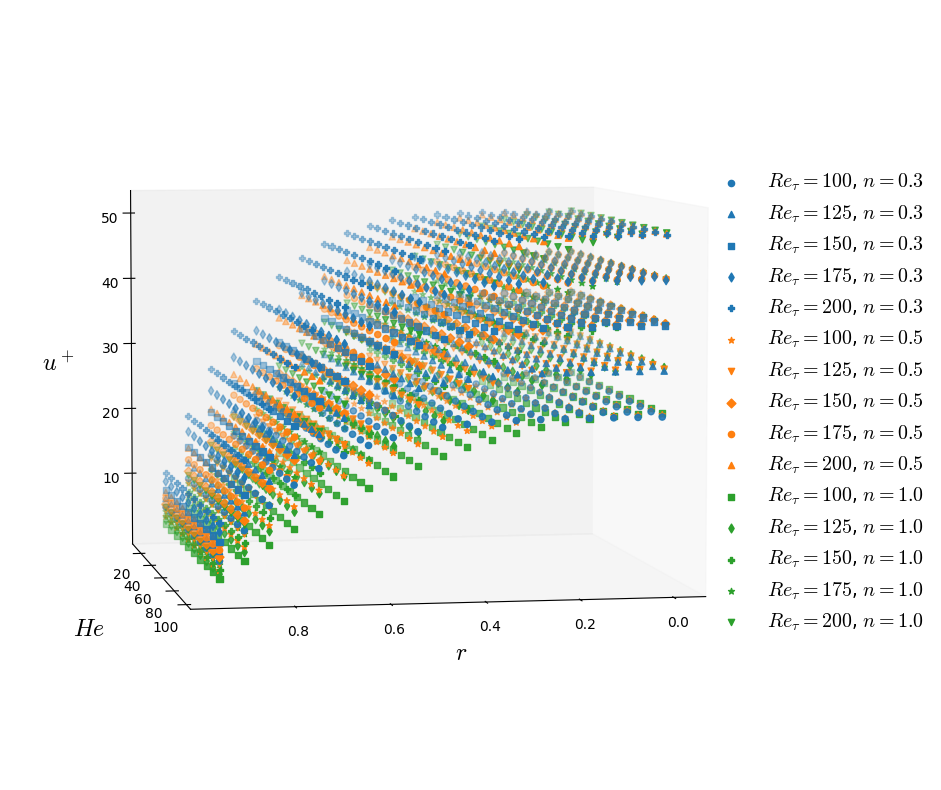

In [2]:
plot_HB_data()

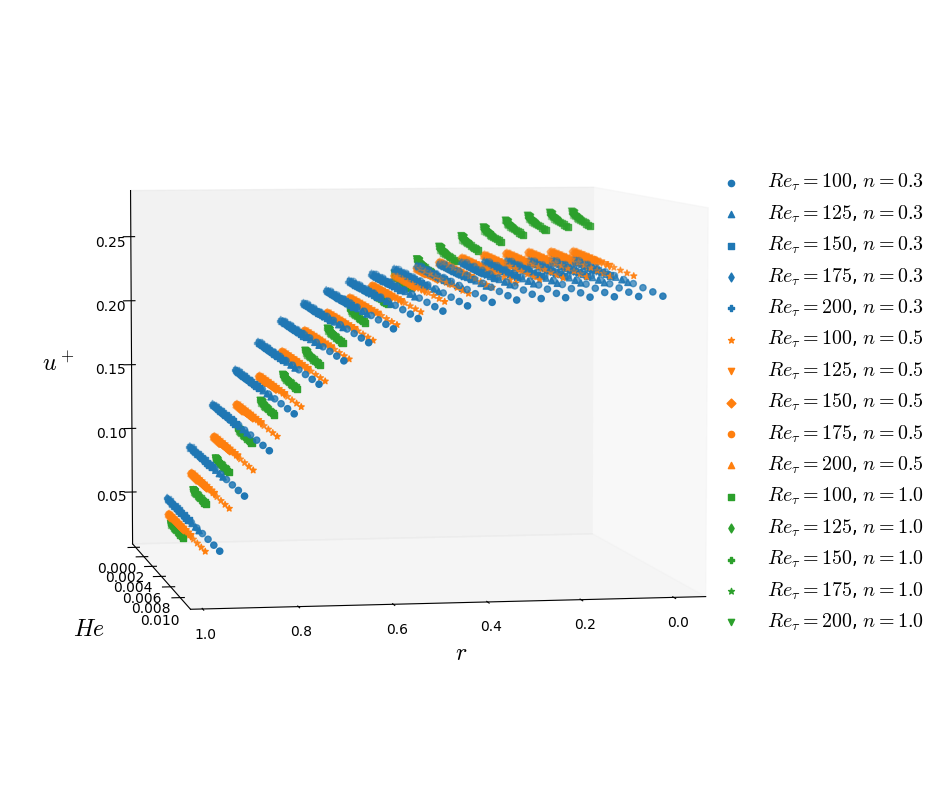

In [3]:
exponents_dict = {"n=0.3": {'r^': {'Re_tau': 0.0016065883}, 'He': {'Re_tau': -1.9742882}, 'u+': {'Re_tau': -1.0161949}},
"n=0.5": {'r^': {'Re_tau': 0.00067248574}, 'He': {'Re_tau': -2.0464225}, 'u+': {'Re_tau': -1.0105762}},
"n=1.0": {'r^': {'Re_tau': -0.00057774433}, 'He': {'Re_tau': -2.2646565}, 'u+': {'Re_tau': -0.9865934}}}

plot_HB_data_renormalized(exponents_dict)